### 급속충전 데이터 분석 (2021년 10월~2022년 8월 통합 데이터 활용)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 4] # setting figure size

# 통합하고자 하는 모든 데이터의 연도/월 (각 파일명 참고) 나열
year_month_list = ['2021', '2022', '2206', '2207', '2208']

### 데이터 개요

In [2]:
df_concat_list = []
for year_month in year_month_list:
    df_concat_list.append(pd.read_csv('./data/' + year_month + '_fast_charge_merged_statistics.csv'))

df = pd.concat(df_concat_list, axis=0, ignore_index=True)
df.sort_values(by=['date_start'], ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# 차종 이름 통일시키기
df['car_type'].replace(to_replace='G80e', value='G80', inplace=True)
df['car_type'].replace(to_replace='Kona', value='KONA', inplace=True)
df['car_type'].replace(to_replace='Niro', value='NIRO', inplace=True)

groups = df.groupby('car_type')
print("차종별 급속충전 구간 수")
for name, group in groups:
    print("%6s : %5d" % (name, len(group)))

df_niro = df[df['car_type'].str.contains('(?i)niro')]
df_ioniq5 = df[df['car_type'].str.contains('(?i)ioniq5')]
df_ev6 = df[df['car_type'].str.contains('(?i)ev6')]
df_kona = df[df['car_type'].str.contains('(?i)kona')]
df_g80 = df[df['car_type'].str.contains('(?i)g80')]

car_type_list = ['', '_ev6', '_g80', '_ioniq5', '_kona', '_niro']

for car_type in car_type_list:
    if len(globals()[f'df'+car_type]) == 0:
        car_type_list.remove(car_type)
        continue
    globals()[f'df'+car_type].reset_index(drop=True, inplace=True)
    
print("\n데이터 칼럼 수 : %d" % len(df.columns))
print(list(df.columns))
    
df

차종별 급속충전 구간 수
   EV6 :  4965
   G80 :   861
IONIQ5 :  8712
  KONA :  1299
  NIRO :  5094

데이터 칼럼 수 : 29
['car_id', 'car_type', 'date_start', 'start_soc', 'end_soc', 'charge_quan', 'charge_time', 'charge_speed', 'charge_power_quan', 'mileage', 'current_avg', 'volt_avg', 'extern_temp_avg', 'soc_avg', 'battery_module1_temp_avg', 'charge_power_per_hour', 'accum_mileage', 'temperature_avg', 'wind_speed_avg', 'humidity_avg', 'rainfall_avg', 'snowfall_avg', 'traffic_volume_avg', 'air_co_avg', 'air_no2_avg', 'air_o3_avg', 'air_pm10_avg', 'air_pm25_avg', 'air_so2_avg']


,car_id,car_type,date_start,start_soc,end_soc,charge_quan,charge_time,charge_speed,charge_power_quan,mileage,...,humidity_avg,rainfall_avg,snowfall_avg,traffic_volume_avg,air_co_avg,air_no2_avg,air_o3_avg,air_pm10_avg,air_pm25_avg,air_so2_avg
0,M2210703734,NIRO,2021-11-11 01:48:37.000,81.0,93.5,12.5,1556,28.920308,9.6,NaN,...,80.138810,NaN,NaN,2625200.0,NaN,NaN,NaN,NaN,NaN,NaN
1,M1200607148,NIRO,2021-11-11 07:55:45.000,48.5,77.5,29.0,2170,48.110599,21.6,NaN,...,64.760331,NaN,NaN,2625200.0,NaN,NaN,NaN,NaN,NaN,NaN
2,M1200607524,NIRO,2021-11-11 14:33:28.000,79.0,88.5,9.5,987,34.650456,7.2,NaN,...,56.000000,NaN,NaN,2625200.0,NaN,NaN,NaN,NaN,NaN,NaN
3,M2210703684,NIRO,2021-11-11 14:40:19.000,22.0,59.5,37.5,2299,58.721183,26.4,NaN,...,55.026743,NaN,NaN,2625200.0,NaN,NaN,NaN,NaN,NaN,NaN
4,M1200607123,NIRO,2021-11-11 14:40:52.000,19.5,85.0,65.5,3873,60.883036,48.0,NaN,...,54.610979,NaN,NaN,2625200.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20926,M2210703772,IONIQ5,2022-08-31 16:34:18,53.5,75.0,21.5,552,140.217391,17.7,NaN,...,79.000000,0.0,NaN,2651903.0,0.3,0.02,0.019,11.0,4.0,0.003
20927,M2211122906,EV6,2022-08-31 16:51:16,66.5,73.5,7.0,588,42.857143,6.2,NaN,...,78.300000,0.0,NaN,2651903.0,0.3,0.02,0.019,11.0,4.0,0.003
20928,M2211123086,IONIQ5,2022-08-31 17:56:59,40.5,52.0,11.5,509,81.335953,7.4,NaN,...,70.674419,NaN,NaN,2651903.0,0.3,0.02,0.019,11.0,4.0,0.003
20929,M1200607493,IONIQ5,2022-08-31 18:25:45,46.0,52.5,6.5,580,40.344828,4.9,NaN,...,69.000000,NaN,NaN,2651903.0,0.3,0.02,0.019,11.0,4.0,0.003


### 급속충전시 외기온도에 따른 충전속도와 전류 분포

전체차량의 외기 온도별 급속충전 속도(시간당 SOC 충전량)


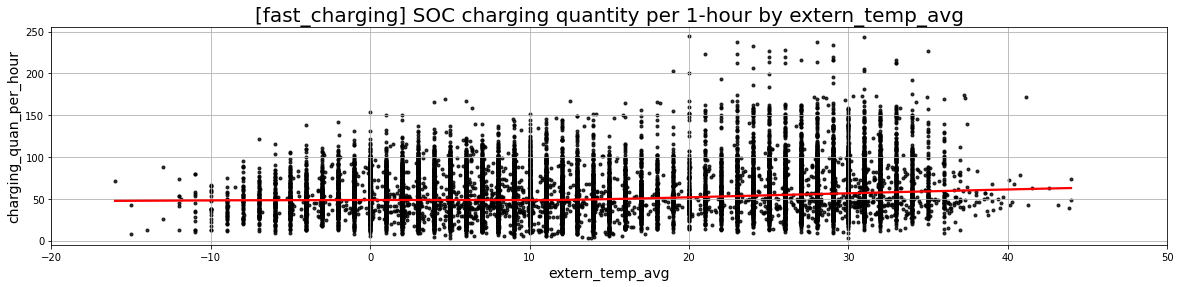

 차량의 외기 온도별 급속충전시 평균 전류


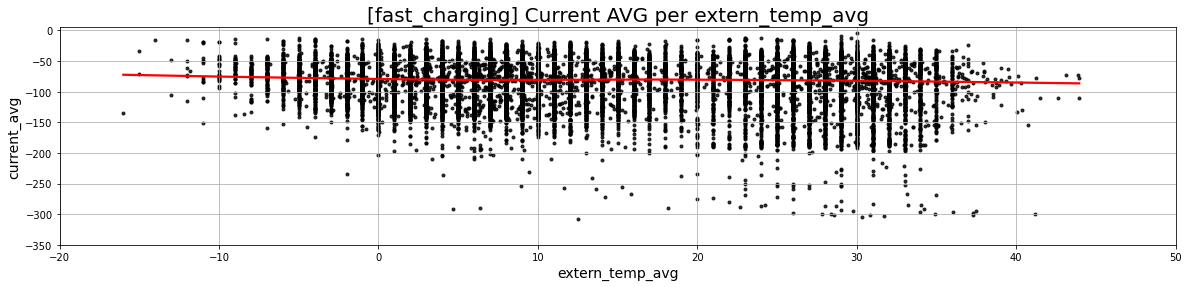

_ev6 차량의 외기 온도별 급속충전시 평균 전류


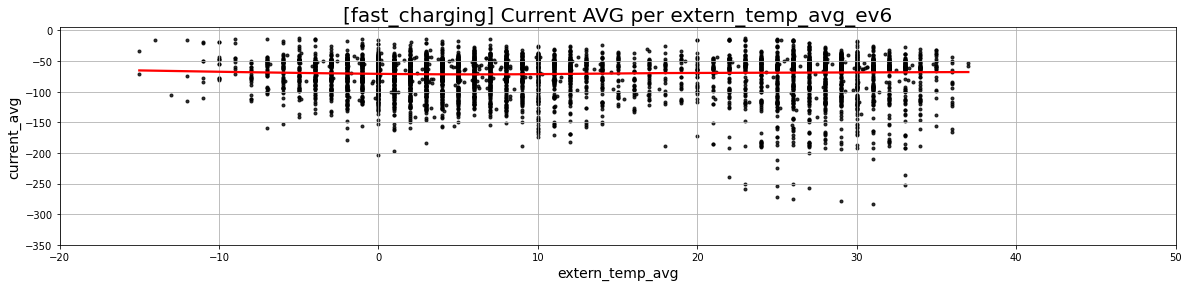

_g80 차량의 외기 온도별 급속충전시 평균 전류


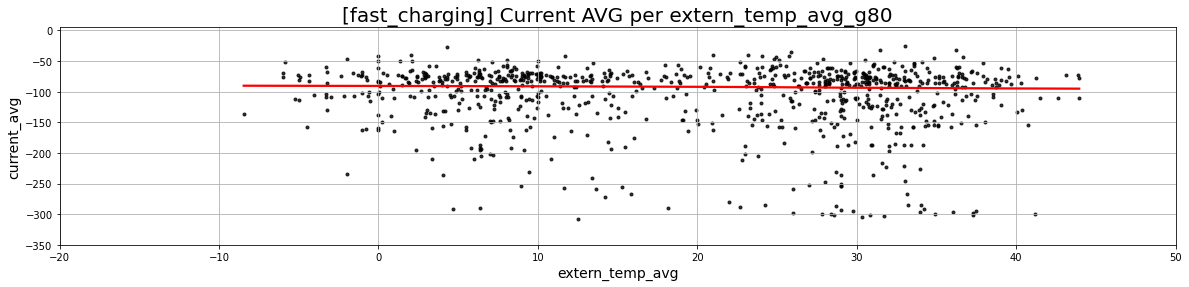

_ioniq5 차량의 외기 온도별 급속충전시 평균 전류


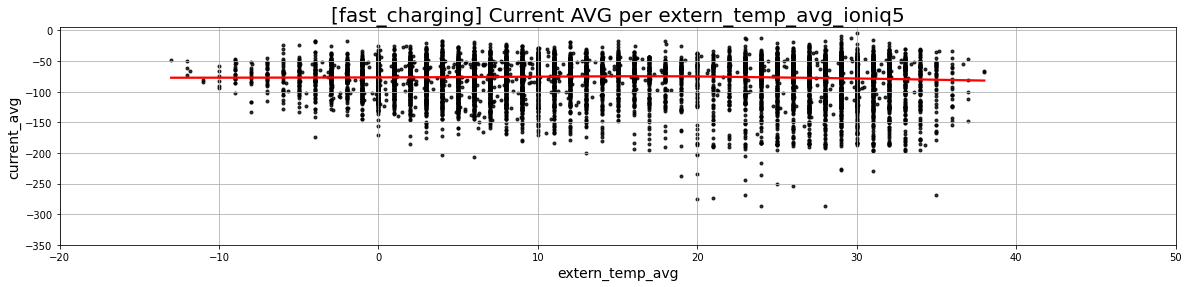

_kona 차량의 외기 온도별 급속충전시 평균 전류


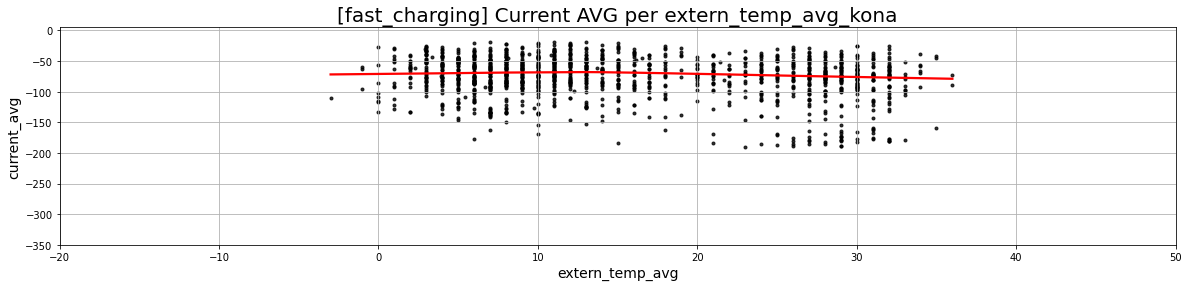

_niro 차량의 외기 온도별 급속충전시 평균 전류


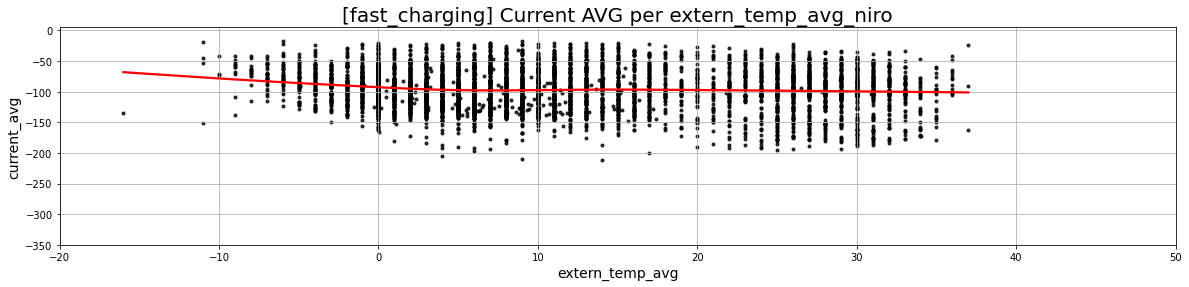

In [3]:
plt.rcParams['figure.figsize'] = [20, 4] # setting figure size

df.sort_values(by=['extern_temp_avg'], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df['charging_quan_per_hour'] = df['charge_speed']

print("전체차량의 외기 온도별 급속충전 속도(시간당 SOC 충전량)")
plt.title('[fast_charging] SOC charging quantity per 1-hour by extern_temp_avg', fontsize=20)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xlim(-20, 50)
plt.ylim(-5, 255)
plt.grid()
sns.regplot(x='extern_temp_avg', y='charging_quan_per_hour', data=df, lowess=True, line_kws={'color': 'red'}, scatter_kws={'color': 'black'}, marker='.')
plt.show()

for car_type in car_type_list:
    print("%s 차량의 외기 온도별 급속충전시 평균 전류" % car_type)
    plt.title('[fast_charging] Current AVG per extern_temp_avg' + car_type, fontsize=20)
    plt.xlabel('', fontsize=14)
    plt.ylabel('', fontsize=14)
    plt.xlim(-20, 50)
    plt.ylim(-350, 5)
    plt.grid()
    sns.regplot(x='extern_temp_avg', y='current_avg', data=globals()[f'df'+car_type], lowess=True, line_kws={'color': 'red'}, scatter_kws={'color': 'black'}, marker='.')
    plt.show()

### 급속충전시 차종별 충전 속도(시간당 SOC 충전량) 분포

차종별 충전속도(시간당 SOC 충전량) 분포


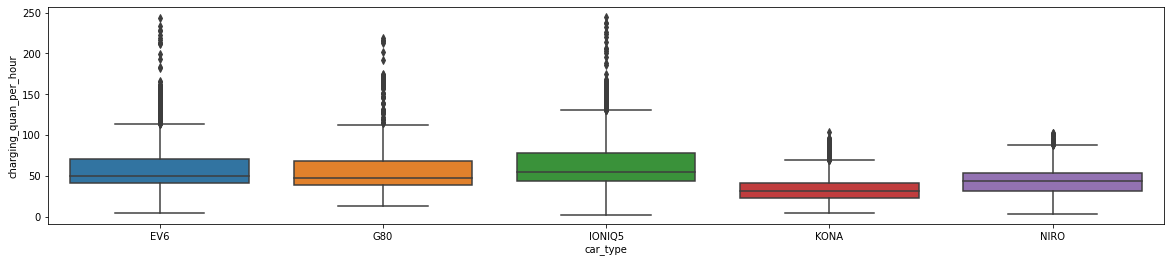

In [4]:
print("차종별 충전속도(시간당 SOC 충전량) 분포")
import seaborn as sns
sns.boxplot(x = 'car_type', y = 'charging_quan_per_hour', data = df, order = ['EV6', 'G80', 'IONIQ5', 'KONA', 'NIRO'])
plt.show()

In [5]:
print("  %s %s %s %s %s" %('차종', '평균충전속도', '최대충전속도', '최저충전속도', '차량수'))
for name, group in groups:
    print("%6s    %.2f        %3d          %3d         %3d" % (name, group['charging_quan_per_hour'].mean(), group['charging_quan_per_hour'].max(),group['charging_quan_per_hour'].min(),len(group)))

  차종 평균충전속도 최대충전속도 최저충전속도 차량수
   EV6    55.18        237            4         4965
   G80    53.30        232            9         861
IONIQ5    55.14        244            3         8712
  KONA    54.94        183            6         1299
  NIRO    56.53        223            3         5094


차종별 충전속도(시간당 SOC 충전량)이 100 미만인 차량의 분포


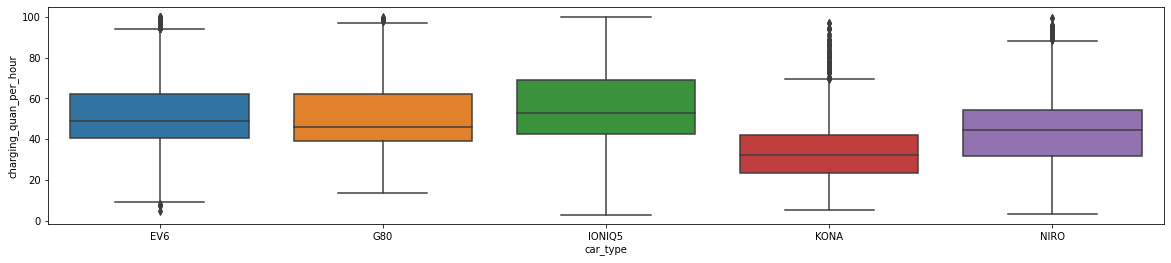

In [6]:
print("차종별 충전속도(시간당 SOC 충전량)이 100 미만인 차량의 분포")
tdf = df.query("charging_quan_per_hour < 100")
sns.boxplot(x = 'car_type', y = 'charging_quan_per_hour', data = tdf, order = ['EV6', 'G80', 'IONIQ5', 'KONA', 'NIRO'])
plt.show()

### 급속충전시 차종별 전류 분포

차종별 평균 전류 분포


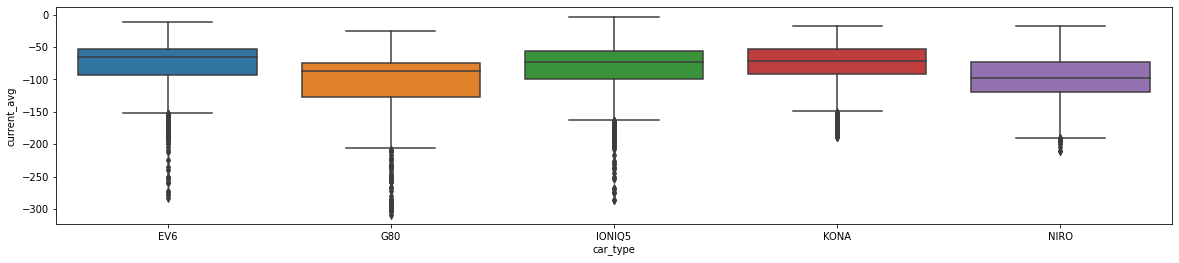

In [7]:
print("차종별 평균 전류 분포")
import seaborn as sns
sns.boxplot(x = 'car_type', y = 'current_avg', data = df, order = ['EV6', 'G80', 'IONIQ5', 'KONA', 'NIRO'])
plt.show()

In [8]:
print("  %s   %s     %s     %s     %s" %('차종', '평균전류', '최대전류', '최저전류', '차량수'))
for name, group in groups:
    print("%6s    %.2f        %3d          %3d         %3d" % (name, group['current_avg'].mean(), group['current_avg'].max(),group['current_avg'].min(),len(group)))

  차종   평균전류     최대전류     최저전류     차량수
   EV6    -84.95        -11          -295         4965
   G80    -82.42        -14          -286         861
IONIQ5    -83.94         -3          -298         8712
  KONA    -83.98        -15          -299         1299
  NIRO    -84.97         -9          -308         5094


### 급속충전시 차종별 전압 분포

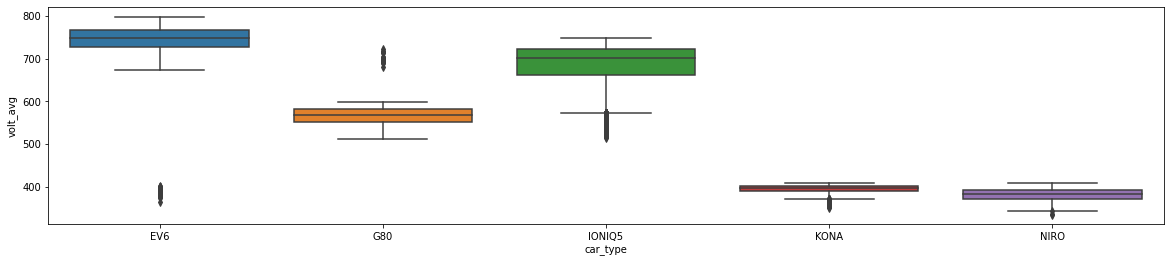

In [9]:
import seaborn as sns
sns.boxplot(x = 'car_type', y = 'volt_avg', data = tdf, order = ['EV6', 'G80', 'IONIQ5', 'KONA', 'NIRO'])
plt.show()

In [10]:
print("  %s   %s     %s     %s     %s" %('차종', '평균전압', '최대전압', '최저전압', '차량수'))
for name, group in groups:
    print("%6s    %.2f        %3d          %3d         %3d" % (name, group['volt_avg'].mean(), group['volt_avg'].max(),group['volt_avg'].min(),len(group)))

  차종   평균전압     최대전압     최저전압     차량수
   EV6    594.76        796          342         4965
   G80    600.85        797          343         861
IONIQ5    599.22        797          336         8712
  KONA    601.40        795          352         1299
  NIRO    601.91        797          335         5094


### 급속충전시 SOC 몇 %에서 주로 충전하는가?

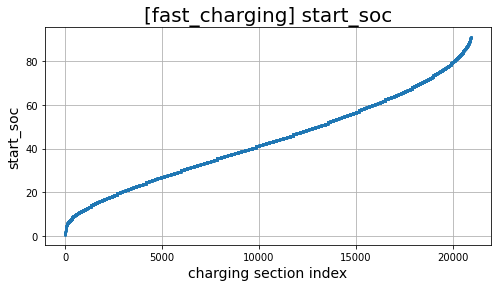

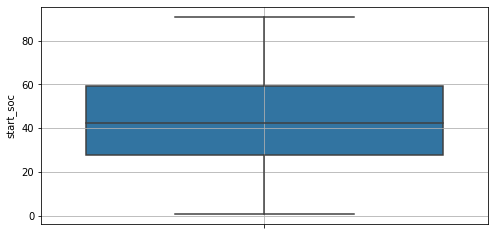

count    20931.000000
mean        43.762386
std         20.347856
min          0.500000
25%         27.500000
50%         42.500000
75%         59.500000
max         91.000000
Name: start_soc, dtype: float64

In [11]:
df.sort_values(by=['start_soc'], ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

plt.rcParams['figure.figsize'] = [8, 4] # setting figure size

plt.plot(df.index,  # x
             df.start_soc,  # y 
             linestyle='none', 
             marker='.', 
             #color='black',
             markersize=3,
             alpha=0.5)

plt.title('[fast_charging] start_soc', fontsize=20)
plt.xlabel('charging section index', fontsize=14)
plt.ylabel('start_soc', fontsize=14)
plt.grid()
plt.show()

import seaborn as sns
sns.boxplot(y = 'start_soc', data = df)
plt.grid()
plt.show()

df['start_soc'].describe()

### 급속충전시 충전전력량 분포

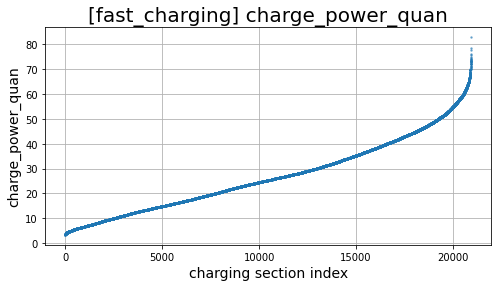

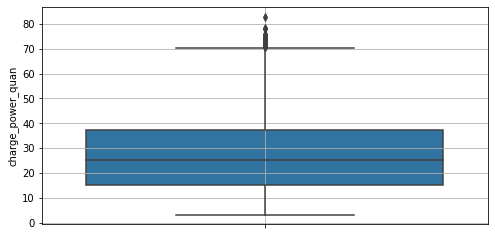

count    20931.000000
mean        27.107821
std         14.565793
min          3.300000
25%         15.200000
50%         25.300000
75%         37.300000
max         82.800000
Name: charge_power_quan, dtype: float64

In [16]:
df.sort_values(by=['charge_power_quan'], ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

plt.rcParams['figure.figsize'] = [8, 4] # setting figure size

plt.plot(df.index,  # x
             df.charge_power_quan,  # y 
             linestyle='none', 
             marker='.', 
             #color='black',
             markersize=3,
             alpha=0.5)

plt.title('[fast_charging] charge_power_quan', fontsize=20)
plt.xlabel('charging section index', fontsize=14)
plt.ylabel('charge_power_quan', fontsize=14)
plt.grid()
plt.show()

import seaborn as sns
sns.boxplot(y = 'charge_power_quan', data = df)
plt.grid()
plt.show()

df['charge_power_quan'].describe()

### PairPlot (상관관계 그래프) - 주행데이터 (전류-외기온도-배터리모듈온도-충전전력량)

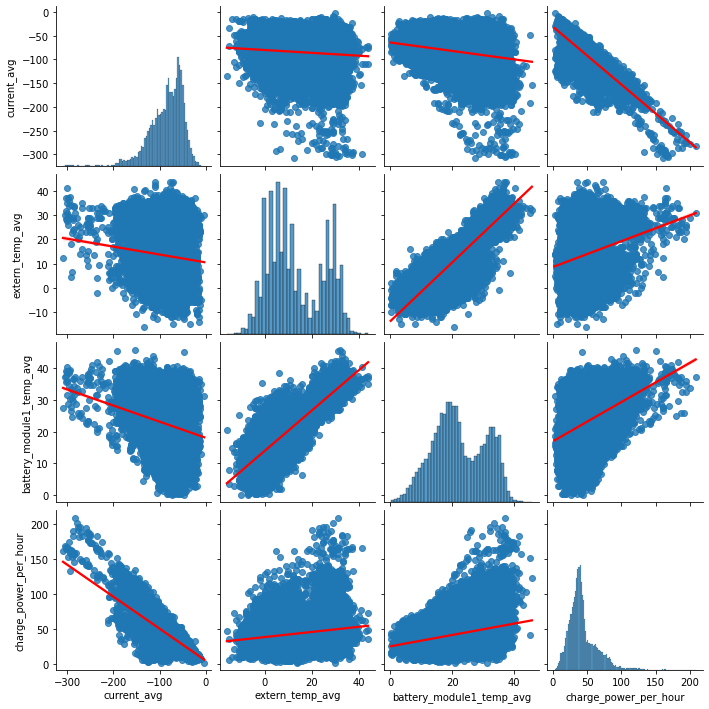

In [13]:
sns.pairplot(df, kind="reg", vars=["current_avg", "extern_temp_avg", "battery_module1_temp_avg", "charge_power_per_hour"], plot_kws={'line_kws':{'color':'red'}})
plt.show()

### PairPlot (상관관계 그래프) - 주행 및 환경데이터 (배터리모듈온도-충전전력량-기온-습도-교통량)

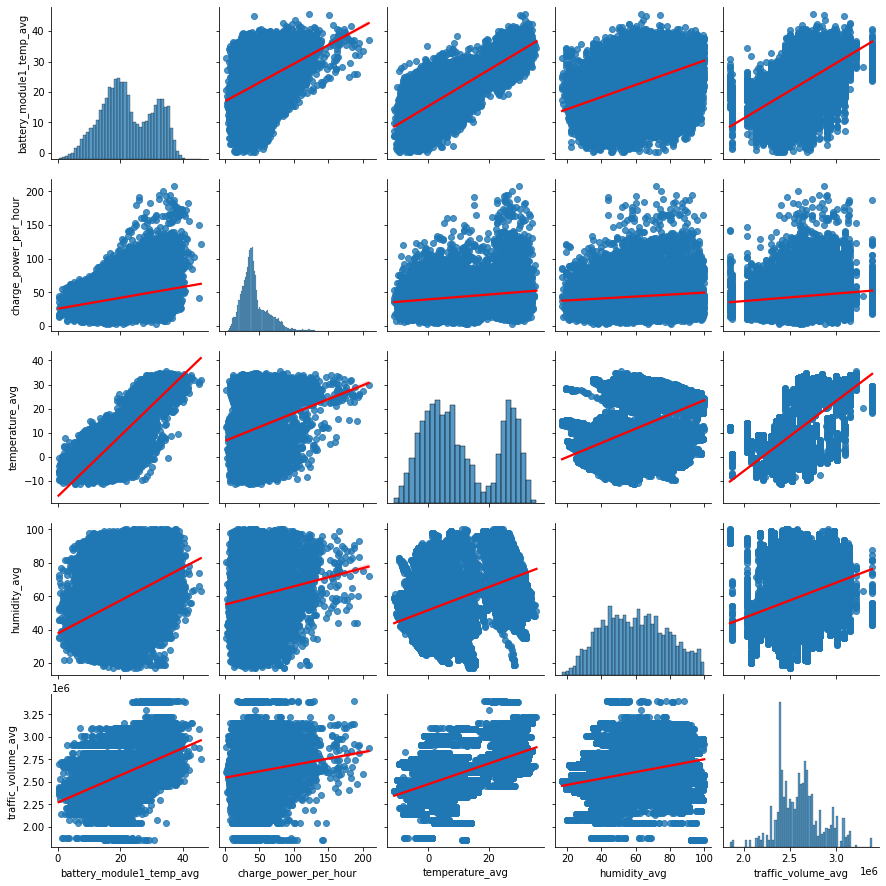

In [14]:
sns.pairplot(df, kind="reg", vars=["battery_module1_temp_avg", "charge_power_per_hour", "temperature_avg", "humidity_avg", "traffic_volume_avg"], plot_kws={'line_kws':{'color':'red'}})
plt.show()